In [2]:
from pathlib import Path

In [6]:
mnist_url = \
'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_dir = Path('data')
data_dir.mkdir(exist_ok=True)
path_gz = data_dir/'mnist.pkl.gz'

In [7]:
from urllib.request import urlretrieve
if not path_gz.exists():
    urlretrieve(mnist_url, path_gz)

In [12]:
import pickle, gzip
with gzip.open(path_gz, 'rb') as f:
    data = pickle.load(f, encoding='latin-1')

In [15]:
((x_train, y_train), (x_valid, y_valid), _) = data

In [17]:
x_train.shape,y_train.shape

((50000, 784), (50000,))

In [32]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [24]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [34]:
t = list(chunks(vals, 5))
t

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

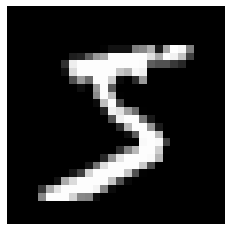

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));
plt.axis('off');

In [58]:
iter1 = iter(vals)
iter1

In [59]:
from itertools import islice

In [61]:
list(islice(iter1, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [63]:
list(islice(iter1, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [62]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

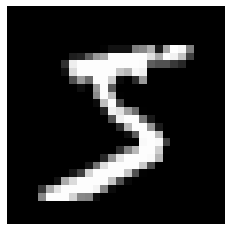

In [68]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img);
plt.axis('off');